# Summary

- Extract data from csv file
- Train and predict next 30 days of data using additive model (Prophet package) and ARIMA model
- Compare actual values with predicted values

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from prophet import Prophet
from prophet.plot import plot_plotly
from pmdarima import auto_arima
import statsmodels.api as sm

In [2]:
# import data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,ds,y
0,2021-08-09,44897.185001
1,2021-08-10,45618.638395
2,2021-08-11,46114.164757
3,2021-08-12,44994.611981
4,2021-08-13,46218.183267


In [3]:
# change datatype
train['ds'] = pd.to_datetime(train['ds'])
test['ds'] = pd.to_datetime(test['ds'])

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      333 non-null    datetime64[ns]
 1   y       333 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.3 KB


In [5]:
# train fbprophet model to predict next 30 days
fbp = Prophet(daily_seasonality = True)
fbp.fit(train)
future = fbp.make_future_dataframe(periods=30)
forecast = fbp.predict(future)

10:38:04 - cmdstanpy - INFO - Chain [1] start processing
10:38:04 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
plot_plotly(fbp,forecast)

In [7]:
test["Forecast_Prophet"] = forecast.yhat.values[-30:]

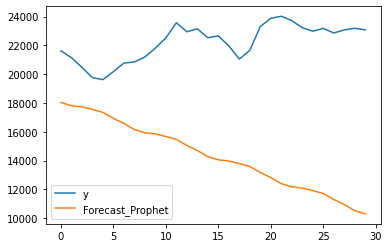

In [8]:
# compare actual values with predicted values
test[["y", "Forecast_Prophet"]].plot()

In [9]:
test

,ds,y,Forecast_Prophet
0,2022-07-09,21622.120907,18034.027249
1,2022-07-10,21144.585205,17808.997949
2,2022-07-11,20472.120799,17725.996079
3,2022-07-12,19760.332209,17550.887123
4,2022-07-13,19619.221321,17345.367695
5,2022-07-14,20173.887362,16931.358331
6,2022-07-15,20768.469833,16574.576581
7,2022-07-16,20846.465988,16155.813747
8,2022-07-17,21189.786762,15930.784447
9,2022-07-18,21807.409049,15847.782577


In [10]:
# find best ARIMA model (0,1,1)
stepwise_fit = auto_arima(train['y'], trace = True, suppress_warnings= True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5666.473, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5670.277, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5663.517, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5663.362, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5669.343, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5665.354, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5665.290, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5667.197, Time=0.65 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5662.402, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5664.404, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=5664.381, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5662.613, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=5666.316, Time=0.25 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.222 seconds


In [11]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  333
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2829.201
Date:                Mon, 08 Aug 2022   AIC                           5662.402
Time:                        10:38:08   BIC                           5670.012
Sample:                             0   HQIC                          5665.437
                                - 333                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1075      0.024      4.495      0.000       0.061       0.154
sigma2      1.444e+06   6.77e+04     21.329      0.000    1.31e+06    1.58e+06
===================================================================================
Ljung-Box (L1) (Q):                   3.97   Jarque-Bera (JB):               161.62
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
# train ARIMA model
model = sm.tsa.arima.ARIMA(train['y'], order = (0,1,1))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  333
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2829.201
Date:                Mon, 08 Aug 2022   AIC                           5662.402
Time:                        10:38:08   BIC                           5670.012
Sample:                             0   HQIC                          5665.437
                                - 333                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1075      0.024      4.495      0.000       0.061       0.154
sigma2      1.444e+06   6.77e+04     21.329      0.000    1.31e+06    1.58e+06
===================================================================================
Ljung-Box (L1) (Q):                   3.97   Jarque-Bera (JB):               161.62
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
# extract predicted values
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start, end=end,typ='levels')
test['Forecast_arima'] = pred.values
print(pred)

333    21852.660181
334    21852.660181
335    21852.660181
336    21852.660181
337    21852.660181
338    21852.660181
339    21852.660181
340    21852.660181
341    21852.660181
342    21852.660181
343    21852.660181
344    21852.660181
345    21852.660181
346    21852.660181
347    21852.660181
348    21852.660181
349    21852.660181
350    21852.660181
351    21852.660181
352    21852.660181
353    21852.660181
354    21852.660181
355    21852.660181
356    21852.660181
357    21852.660181
358    21852.660181
359    21852.660181
360    21852.660181
361    21852.660181
362    21852.660181
Name: predicted_mean, dtype: float64


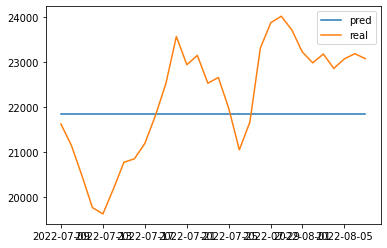

In [14]:
# compare actual values with predicted values
plt.plot(test['ds'],pred)
plt.plot(test['ds'],test['y'])
plt.legend(['pred','real'])
plt.show()

In [15]:
test

,ds,y,Forecast_Prophet,Forecast_arima
0,2022-07-09,21622.120907,18034.027249,21852.660181
1,2022-07-10,21144.585205,17808.997949,21852.660181
2,2022-07-11,20472.120799,17725.996079,21852.660181
3,2022-07-12,19760.332209,17550.887123,21852.660181
4,2022-07-13,19619.221321,17345.367695,21852.660181
5,2022-07-14,20173.887362,16931.358331,21852.660181
6,2022-07-15,20768.469833,16574.576581,21852.660181
7,2022-07-16,20846.465988,16155.813747,21852.660181
8,2022-07-17,21189.786762,15930.784447,21852.660181
9,2022-07-18,21807.409049,15847.782577,21852.660181
